# Machine Learning Essentials
This chapter focuses on machine learning as a practical part of data science. Following topics will be covered:
- Defining the different types of machine learning, along with examples of each kind
- Regression and Classification
- What is machine learning and how is it used in data science?
- The differences between machine learning and statistical modeling and how machine learning is a broad category of the latter

## What is Machine Learning

- machine learning models can learn without the explicit help of a human - that's the main difference between ML models and a classical algorithm
- one of many tools in the belt of a data scientist. A true data scientist will be able to recognize when ML is applicable and when it is not
- ML is a game of correlations and relationships. Most machine learning algorithms are concerned with finding and/or exploiting relationships between datasets (columns in pandas 

## Some universal assumptions
- The data used is preprocessed and cleaned using methods in earlier chapters. Dirty data with missing values is tolerated by almost no ML models
- Each row of a cleaned dataset represents a single observation of the environment we're trying to model.
- If we're finding relationships between variables, there is an assumption of some kind of relationship between variables. They can't communicate that there is not relationship
- Machine learning is semi-automatic, intelligent decisions by humans are still needed
- Most ML models are sensitive to noisy data.

## Types of ML
You can segment ML models by different characteristics including
- Types of data/organic structures utilized (tree/graph/neural network)
- Field of math they most relate to (statistical/probabilistic)
- Level of computation required to train (deep learning

For this book, there are 3 primary categories
1. Supervised Learning (predictive analytics models) 
    - Predicts the future (target variable/label) based on the past (features/predictors/input variables)
    - Requires labelled data
    - can eparate data into two parts
      - Predictors (features/input variables)
      - Response (outcome/label/target)
    - requires labelled data, which can often be hard to obtain.
    - can also be used to simply establish relationship between variables. The fact a model can make accurate predictions given just a certain set of predictors, implies there's a relationship between the variables.
    - two types of supervised learning
      - **regression** - continuous response
      - **classification** - discrete response
    - benefits
      - it can make future predictions
      - it can quantify relationships between predictors and response variables
      - it can show us how variables affect each other and by how much
    - cons:
      - it requires labelled data (difficult to get)
    - Sometimes can be difficult to choose between regression or classification
2. Unsupervised Learning
   - takes a set of predictors and utilizes relationships between them in order to accomplish tasks such as:
     - **dimension reduction:** reducing dimension of the data by condensing variables together. Example is file compression.
     - **clustering:** finds and groups together observations that behave similarly
    - benefits
      - Can find groups of data points that behave similarly that humans would not have noted
      - can be a preprocessing step for supervised learning. Cluster a bunch of data then use these clusters as the response
      - can use unlabelled data, which is easier to find
    - cons:
      - zero predictive power
      - hard to determine if on right track
      - relies much more on human interpretation.
    - benefit: does not require labelled data
    - drawback: lose all predictive power, because the response variable holds the information to make predictions, and without it, model is hopeless
    - big drawback: difficult to see how well we are doing, no answers to compare our models to.
    - partial solution: requires human interpretation
3. Reinforcement Learning
    - Algorithm chooses an action in an environment and is rewarded (positively or negatively) for choosing action. Algorithm them adjusts iself and modifies its strategy in order to accomplish some goal, which is usually to get a reward
    - very popular in AI-assisted gameplay, robotics, self-automating machinery as *agents*(AI) are allowed to explore a virtual/real world, collect rewards, and learn best navigation techniques
    - Similar to supervised learning, but reward does not have to be tied in any way to a *correct* or *incorrect* decision.
    - reinforcement learning is least explored of these types of ML, and not explored in great detail in this text.
    - benefits:
      - Very complicated reward systems create very complicated AI systems
      - it can learn in almost any environment, including Earth
    - cons:
      - The agent is erratic at first and makes many terrible choices before realizing that these choices have negative rewards

A point of note, he uses ML Model where I think ML Algorithm seems more appropriate, because the model expresses the relationship between predictor and response.

Rest of the chapter focuses on Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bikes = pd.read_csv('bike-sharing-demand/train.csv')

In [2]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bikes.shape

(10886, 12)

Each row represents a single hour of bike usage. In this case, we're interested in predicting ```count```, which represents the total number of bikes rented in that hour

<AxesSubplot:xlabel='temp', ylabel='count'>

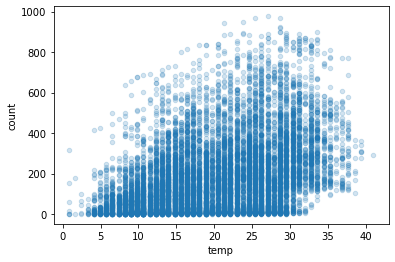

In [4]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)
#alpha seems to be the size of the dots

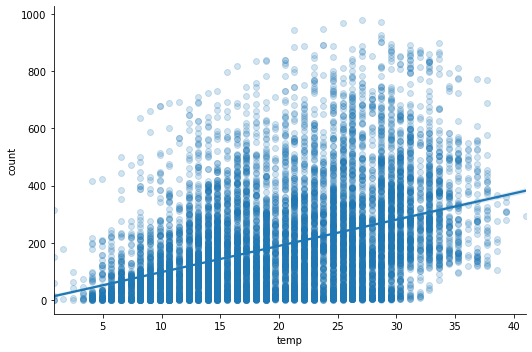

In [5]:
import seaborn as sns #using seaborn to get a line of best fit
sns.lmplot(x = 'temp', y = 'count', data=bikes, aspect = 1.5, scatter_kws={'alpha':0.2})

It appears that as ```temp``` goes up, our ```count``` also goes up. 

In [6]:
bikes[['count', 'temp']].corr()
#correlation coefficient implies a weak positive correlation between the two variables

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


The best fit line has the smallest **sum of squared residuals**, we are going to try to find this line in python

In [7]:
#create X and y where X has only 1 feature 'temp'
feature_cols = ['temp'] #list of predictors
X=bikes[feature_cols] #subsetting our data to only the predictors
y=bikes['count'] #response variable

In [8]:
# import scikit-learn, our machine learning module
from sklearn.linear_model import LinearRegression

In [9]:
linreg=LinearRegression() #instantiate new model
linreg.fit(X, y) #fit model to our data

#print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616469
[9.17054048]


$B_0$(6.04) is the value of ```y``` when ```X=0```
- it is the estimateion of bikes that will be rented when temperature is 0 degrees Celsius
- So, at $0$ degrees, six bikes are predicted to be in use (its cold!)

$B_1$(9.17) is our temperature coefficient
- change in $y$ divided by the change in $x_1$.
- represents how $x$ and $y$ move together.
- change in $1$ degree Celsius is associate with an increase in about nine bikes rented
- sign of coefficient is important. If negative, would imply a rise in temp is associated with drop in rentals.

In [10]:
#ooooh fun, I'm learning how to actually predict with a model
linreg.predict([[20]])
#in book he just input 20 instead of the brackets

array([189.45702259])

So 190 bikes will likely be rented if temp is 20 degrees

## Adding more predictors
Adding more predictors to the model is as simple as telling the linear regression model in ```scikit-learn``` about them. 

Before doing that we should go through data dictionary to make sense of predictors.

In [11]:
#create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']
#create X and Y
X = bikes[feature_cols]
y = bikes['count']

#instantiate and fit
linreg = LinearRegression()
linreg.fit(X,y)

#pair the feature names with the coefficients
result = zip(feature_cols, linreg.coef_)
resultSet=set(result)
print(resultSet)
#also LOL at the appropriately named zip function

{('weather', 6.670302035923754), ('season', 22.53875753246686), ('temp', 7.864824992477452), ('humidity', -3.118873382396494)}


These coefficients correspond to how much change in $y$ a 1 unit increase (holding other dimensions constant) in $x_i$ would lead to. Surprisingly as ```weather``` goes up (weather gets closer to overcast), the bike demand goes up, as is the case when season variables increase (we approach winter.). Highly unexpected!

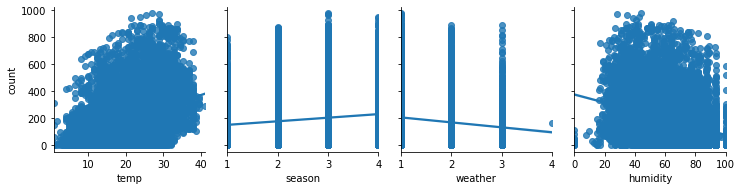

In [12]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
#multiple scatter plots
sns.pairplot(bikes, x_vars = feature_cols, y_vars='count', kind='reg')

Looking at this, we see the weather line is trending downward, which is opposite of what last model was suggesting (since temp tends to not increase as more harsh weather comes). Now we need to see which predictors are helping make the prediction and which are noise. So we need more advanced metrics.

## Regression Metrics
3 main ones when using regression ML models:
- The mean absolute error
- The mean squared error
- The root mean squared error

In [13]:
# example true adn predicted response values
true = [9, 6, 7, 6]
pred = [8, 7, 7, 12]
#note that each value in the last represents a single prediction for a model
#so we are comparing four predictions to four actual answers

#wants students to calculate by hand, but I'm a mathematician, so I don't know I will benefit
from sklearn import metrics
import numpy as np
print ('MAE: ', metrics.mean_absolute_error(true, pred))
print('MSE: ', metrics.mean_squared_error(true, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE:  2.0
MSE:  9.5
RMSE:  3.082207001484488


- MAE is easiest to understand since it denotes, on average, how wrong the model is
- MSE tends to be more effective than MAE, because MSE punishes larger errors, which tends to be much more useful in the real world
- RMSE is even more popular than MSE, because its much more interpretable

Next we use RMSE to ascertain which columns are helping and which are hurting.

In [14]:
#using just temperature
from sklearn import metrics

feature_cols = ['temp']
#create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))
#RMSE, can be interpreted loosely as an average error

166.44886243326746

In [15]:
#using temperature and humidity
from sklearn import metrics

feature_cols = ['temp', 'humidity']
#create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))
#RMSE, can be interpreted loosely as an average error

157.7992451452858

In [16]:
#using just temperature
from sklearn import metrics

feature_cols = ['temp', 'humidity', 'season', 'holiday', 'workingday', 
               'windspeed', 'atemp']
#create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))
#RMSE, can be interpreted loosely as an average error

155.75989143430357

We are training the line here to fit to ```X``` and ```y``` and then asking it to predict ```X``` again! Huge mistake as it can lead to **overfitting**, which means the model is merely *memorizing* the data and regurgitating it back to us, gross!

To combat the overfitting problem, use a train/test approach to fit machine learning models. Essentially take the following steps
1. Split up the dataset into two parts: a training and test set
2. Fit our model on the training set and then test it on the test set 
2. (.5) parameter tuning 
3. Once model is good enough (based on metrics), we turn our model's attention toward the entire dataset
4. Our model awaits new data previously unseen by anyone.

The goal here is to minimize the out-of-sample errors of our model, which are the errors our model has on data that it has never seen before.

In [17]:
from sklearn.model_selection import train_test_split
#function that splits data into training and testing sets
#note that the book suggests sklearn.cross_validation, 
#but it appears this function is not in cross_validation anymore

feature_cols = ['temp']
X=bikes[feature_cols]
y=bikes['count']
#setting our overall data X, and y
#note in this example we're attempting to find an association
#between the temperature of the day and the number of bike rentals

X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train and y_train will be used to train the model
#X_test and y_test will be used to test the model
#remember that all four of these variables are just subsets of the overall X and Y

linreg = LinearRegression()
#instantiate the model

linreg.fit(X_train, y_train)
# fit the model to our training set

y_pred = linreg.predict(X_test)
#predict our testing set

np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# calculate our metric

168.196847178697

In [18]:
feature_cols = ['temp', 'workingday']
X=bikes[feature_cols]
y=bikes['count']
#setting our overall data X, and y
#note in this example we're attempting to find an association
#between the temperature of the day and the number of bike rentals

X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train and y_train will be used to train the model
#X_test and y_test will be used to test the model
#remember that all four of these variables are just subsets of the overall X and Y

linreg = LinearRegression()
#instantiate the model

linreg.fit(X_train, y_train)
# fit the model to our training set

y_pred = linreg.predict(X_test)
#predict our testing set
np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# calculate our metric

170.9931404817601

Looks like adding this predictor actually made things a little bit worse, so workingday might not be very predictive or our response, the bike rental count. 

As a side note, this seems to be how you do data science, add features and see how it affects the metric. Even better, automate this process somehow and assess how effective the model is at all chosen permutations. Pick best one. I think this is what the Automated ML is doing somewhat

### Null Model
We have root mean squared error of 167 bikes, but is this any good? One way to discover this is to evaluate the **null model**.

THe null model in supervised machine learning represents effectively guessing the expected outcome over and over, and seeing how you did.

In [19]:
average_bike_rental = bikes['count'].mean()
average_bike_rental

191.57413191254824

So in the bike example, the average number of bikes that go out every hour is about 192. 

In [26]:
num_rows = bikes.shape[0]
print(num_rows)

null_model_predictions = [average_bike_rental]*num_rows
null_model_predictions[1]

10886


191.57413191254824

In [27]:
np.sqrt(metrics.mean_squared_error(y, null_model_predictions))

181.1361335742659

### Logistic Regression
Logistic regression is a generalization of the linear regression model that was adapted to fit classification problems. In logistic regression, we use a set of quantitiative features to predict the *probabilities* of class membership. These probabilites can then be mapped to class labels, hence predicting a class for each observation.

Logistic regression, uses the following form:
$$\pi = Pr(y=1|x)=\frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$

Here, $y$ reperesents the conditional probability that our response variable belongs to class $1$, given our data, $x$.

$$\text{Odds}=\frac{P}{1-P}$$

In [28]:
#use python to make a table of probabilities and associated odds.
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds']=table.probability/(1-table.probability)
print(table)

   probability      odds
0         0.10  0.111111
1         0.20  0.250000
2         0.25  0.333333
3         0.50  1.000000
4         0.60  1.500000
5         0.80  4.000000
6         0.90  9.000000


Problem here that the top of odds approaches infinity as probability approaches 1. Also, odds will only approach 0, and never reach it, that's a problem for classification too

In [34]:
np.log(10) #e^2.303 = 10

2.302585092994046

In [35]:
2.71828**2.3025850929940459 #e^ log(10) == 10

9.999984511610785

In [36]:
table['logodds'] = np.log(table.odds)
print(table)

   probability      odds   logodds
0         0.10  0.111111 -2.197225
1         0.20  0.250000 -1.386294
2         0.25  0.333333 -1.098612
3         0.50  1.000000  0.000000
4         0.60  1.500000  0.405465
5         0.80  4.000000  1.386294
6         0.90  9.000000  2.197225


In [37]:
#just double checking that our function works
prob = .25

odds = prob/ (1-prob)
print(odds)

logodds = np.log(odds)
print(logodds)

0.3333333333333333
-1.0986122886681098


Logodds goes below zero and goes bove zero, so is a good candidate (but this is where I'm kind of not loving this book since Linear regression has this same attribute, so the reasoning is kind of faulty)

### Math of Logistic Regresion
Simply, logistic regression is a linear regression between feature, $x$, and the log-odds of our data belonging to a certain class

If $p$ represents the probability of a data point belonging to a particular class, then the logistic regression can be written as follows
$$log_e \frac{p}{1-p}=\beta_0 + \beta_1 x$$
if we rearrange and solve for $p$ we get the logistic function, which takes an S shape, and $y$ is bounded by $[0, 1]$:
$$p = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$

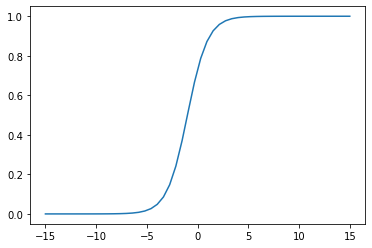

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

#Defining the logistic function
def logistic_function(x, beta_0=1, beta_1=1): #when you set variables equal to something like this in python, 
    return np.exp(beta_0+beta_1*x)/(1+ np.exp(beta_0+beta_1*x))

#set the y and x values our graph will range over
x_values = np.linspace(-15,15)
y_values = [logistic_function(x) for x in x_values]



#plot our graph of the logistic function with beta_0 = 1 and beta_2 = 1
plt.plot(x_values, y_values)

In [43]:
print(logistic_function(-10))
print(logistic_function(10))

0.00012339457598623172
0.9999832985781519


- Logistic regression gives an output of the probabilities of a specific class being true
- These probabilities can be converted into class probabilities
- It takes an S shape
- Output is bounded by $0$ and $1$ as probabilities should be

Examples have mostly been binary classification, but logistic regression can handle predicting multiple options in our categorial response using a one-versus-all approach, meaning that it will fit a probability curve for each categorical response!

In [44]:
#make a categorical response where entries in the above_average column
# are True if the hourly bike rental count is above average, false otherwise
bikes['above_average'] = bikes['count'] >= average_bike_rental

In [45]:
bikes['above_average'].head()

0    False
1    False
2    False
3    False
4    False
Name: above_average, dtype: bool

We should look at null model. In regression, null model always predicts average response, but in classification, null model predicts the most common outcome. In the following, we see that 60% of the time, bike rental count is not above average.

In [46]:
bikes['above_average'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: above_average, dtype: float64

In [47]:
from sklearn.linear_model import LogisticRegression

feature_cols = ['temp']
#using only temperature

X=bikes[feature_cols]
y=bikes['above_average']
#make our overall X and y variables, this time our y is
# our binary response variable, above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)
# make our train test split

logreg = LogisticRegression()
#instantiate model

logreg.fit (X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of our sample performance

0.6671565025716385

Using only temperature, we can beat the null model of guessing false all of the time!! WOO!!! This is the first step in making our model the best it can be.

### Dummy Variables
Dummy variables are used when we are hoping to convert to a categorical feature into a quantitative one. Remember, we have two types of categorical features: nominal and ordinal. Ordinal features have natural order among them, while nominal data does not.

**Encoding qualitative (nominal) data using separate columns is called making dummy variables, and it works by turning each unique category of a nominal column into its own column that is either true or false** (note to self: I didn't do this when I ran my linear regression on the Kaggle bike data, GRRR, but I'm glad to learn this, this will be a useful piece of advice!!!

In our bike example, define new column, called ```when_is_it```, which is going to be one of the following four options:
- ```Morning```
- ```Afternoon```
- ```Rush_hour```
- ```Off_hours```
To do this, make new column that is simply the hour of the day, use the column to determine when in the day it is, and explore whether or not we think that column might help us predict the ```above_daily``` column:

In [50]:
bikes['hour'] = bikes['datetime'].apply(lambda x:int(x[11]+x[12]))
#make a column that is just the hour of the day
#note to self, I NEED to learn this lambda stuff!!!!

bikes['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [51]:
# this function takes in an integer hour
# and outputs one of our four options
def when_is_it(hour):
    if hour >=5 and hour < 11:
        return 'morning'
    elif hour >=11 and hour < 16:
        return 'afternoon'
    elif hour >=16 and hour < 18:
        return 'rush_hour'
    else:
        return 'off_hours'

In [54]:
type(bikes['count'])

pandas.core.series.Series

In [55]:
type(bikes)

pandas.core.frame.DataFrame

In [56]:
# Series.apply() is how you apply functions to entries in Series
bikes['when_is_it'] = bikes['hour'].apply(when_is_it)
bikes[['when_is_it', 'above_average']].head()

,when_is_it,above_average
0,off_hours,False
1,off_hours,False
2,off_hours,False
3,off_hours,False
4,off_hours,False


Before determining whether or not the hourly bike rental count will be above average, do basic exploratory data analysis and make a graph to see if we can visualize a difference between the four times of the day. 

Graph will be a bar chart with one bar per time of day, each bar represents the percentage of times that this time of day had a greater than normal bike rental:

In [62]:
print(bikes.groupby('when_is_it').above_average) 
#how can we call a mean on this?

<AxesSubplot:xlabel='when_is_it'>

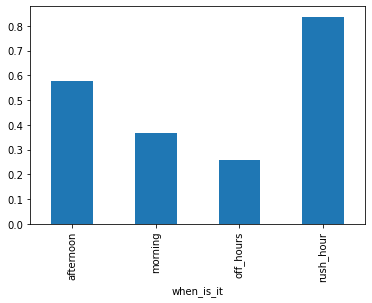

In [58]:
#dont understand so I'm adding cells above to figure out what's going on here:
bikes.groupby('when_is_it').above_average.mean().plot(kind='bar')

In [64]:
when_dummies = pd.get_dummies(bikes['when_is_it'], prefix = 'when__')
when_dummies.head()

,when___afternoon,when___morning,when___off_hours,when___rush_hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [65]:
when_dummies=when_dummies.iloc[:, 1:]
#remove the first column - seems like a useful function, I don't understand notation
when_dummies.head()

,when___morning,when___off_hours,when___rush_hour
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [68]:
X = when_dummies
# our new X is our dummy variables
y=bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)
# make our train test split, this wasn't in book, but I"m including is
# since I know its necessary

logreg=LogisticRegression()
#istantiate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
#score it on our test set to get a better sense of out of sample performance


0.6903012490815577

This is even better than just using temperature! So what if we added these on?

In [70]:
new_bike = pd.concat([bikes[['temp', 'humidity']], when_dummies], axis=1) #combine temperature, humidity, and the dummy variable

X=new_bike #our new X is our dummy variables

y = bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)
# make our train test split

logreg = LogisticRegression() #instantiate our model

logreg.fit(X_train, y_train) #fit model to training set

logreg.score(X_test, y_test) #score on test set to get better sense of sample performance

0.7619397501836884

Wowzers, that's much better!!!